In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Задание 1

In [113]:
df = pd.read_csv('water.csv')

In [114]:
df

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


### Задание 2

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

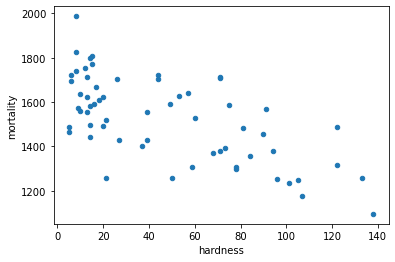

In [4]:
df.plot(kind='scatter', x='hardness', y='mortality')

In [128]:
# коэффициент корреляции Пирсона

df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [6]:
#коэффициент корреляции Спирмена

df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [7]:
# коэффициент корреляции Кендалла

df[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [59]:
X = df[['hardness']]
y = df['mortality']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [40]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [41]:
print('y = ', model.coef_[0], '* x +', model.intercept_)

y =  -3.1316708721378266 * x + 1668.9722977277095


In [42]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [43]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.5046490611017092

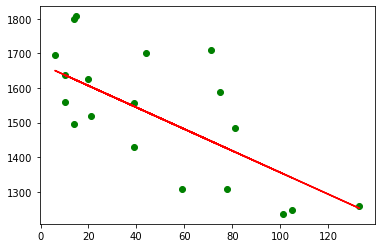

In [214]:
# plt.scatter(X, y, s=80, color='red')              # как выглядит полный набор данных
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_pred, c='r')


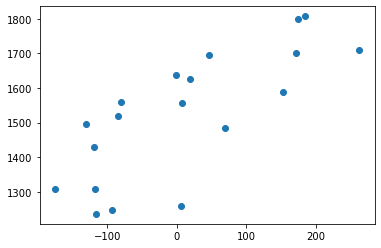

In [213]:
# график остатков

residuals = y_test-y_pred
plt.scatter(residuals, y_test)

Вывод: на мой взгляд, связь если и есть, то очень относительная и с учетом еще не одного параметра. 
Коэффициенты корреляции Пирсона и Спирмена, говорят, что связь даже как бы выше среднего. Но мне кажется, 
что коэффииент Кендалла в данном случае ближе к истине. График ошибок также показывает довольно большие отклонения.
Коэффициент детерминации 0.5, что говорит о наличии некоторой зависимости.

### Задание 3

In [151]:
df_South = df[df.location == 'South']
df_North = df[df.location == 'North']

In [215]:
def analysis(data):
    
    print('Коэффициент корреляции Пирсона', data[['hardness', 'mortality']].corr().iloc[0, 1])
    print('Коэффициент корреляции Спирмена', data[['hardness', 'mortality']].corr(method='spearman').iloc[0, 1])
    print('Коэффициент корреляции Кендалла', data[['hardness', 'mortality']].corr(method='kendall').iloc[0, 1])
    
    # Построение модели
    
    X = data[['hardness']]
    y = data['mortality']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)       
    # при данном значении random_state удалось добиться коэффициента детерминации в диапазоне от 0 до 1 

    
    model = LinearRegression()
    model.fit(X_train, y_train)  # обучение метода

    y_pred = model.predict(X_test)
    
    print('Коэффициент детерминации ', model.score(X_test, y_test)) 
    
    plt.subplot(1, 2, 1)
#     plt.scatter(X, y, s=80, color='red')
    plt.scatter(X_test, y_test, color='green')
    plt.plot(X_test, y_pred, c='r')
    plt.title('Модель линейной регрессии')
    
    plt.subplot(1, 2, 2)
    residuals = y_test-y_pred
    plt.scatter(residuals, y_test)
    plt.title('График остатков')
    
    plt.tight_layout()
    plt.show()
        

Коэффициент корреляции Пирсона -0.6021532715484159
Коэффициент корреляции Спирмена -0.5957229185013566
Коэффициент корреляции Кендалла -0.4403148402800253
Коэффициент детерминации  0.17393348220354532


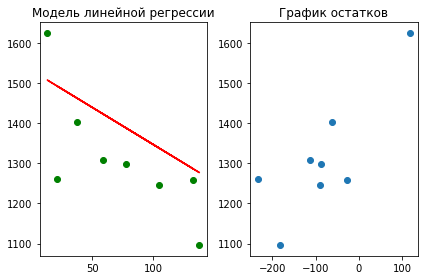

In [216]:
analysis(df_South)

Коэффициент корреляции Пирсона -0.36859783832887183
Коэффициент корреляции Спирмена -0.4042078956511175
Коэффициент корреляции Кендалла -0.2830580977201083
Коэффициент детерминации  0.16919702626557398


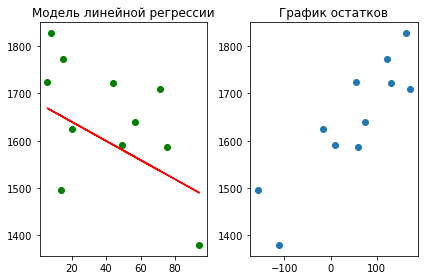

In [217]:
analysis(df_North)

In [ ]:
На мой взгляд разделение ситуацию не спасло. Данных мало. Возможно есть некая взаимосвязь, но однозначно не прямая.